# Uber Eats USA Restaurants and Menus
[Kaggle.com](https://www.kaggle.com/datasets/ahmedshahriarsakib/uber-eats-usa-restaurants-menus)

Quant Squad team
Project Python - Data Science bootcamp

## Initial setup
### Import necessary libraries

In [189]:
import numpy as np
import pandas as pd
import time
import os
import matplotlib.pyplot as plt

In [152]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Find location on local drive where to put data to have option to run your script on kaggle.com without any changes

In [2]:
# where to put data from kaggle.com?
cwd = os.getcwd()
root_dir = os.path.abspath('/')
print('Put your kaggle/input/uber-eats-usa-restaurants-menus folders in folder\n', root_dir)

Put your kaggle/input/uber-eats-usa-restaurants-menus folders in folder
 /


### File paths on kaggle.com

In [ ]:
# paths from kaggle.com
# INPUT
# /kaggle/input/uber-eats-usa-restaurants-menus
# /kaggle/input/uber-eats-usa-restaurants-menus/restaurant-menus.csv
# /kaggle/input/uber-eats-usa-restaurants-menus/restaurants.csv
# OUTPUT
# /kaggle/working/

### Load csv files to dataframes

In [220]:
#input_directory = "/kaggle/input/uber-eats-usa-restaurants-menus"
#input_file_restaurant_menus = '/kaggle/input/uber-eats-usa-restaurants-menus/restaurant-menus.csv'
#input_file_restaurants = r"/kaggle/input/uber-eats-usa-restaurants-menus/restaurants.csv"

#it didnt worked on my mac - used local paths
input_file_restaurant_menus = '/Users/user/dorota/Datasets/restaurant-menus.csv'
input_file_restaurants = r"/Users/user/dorota/Datasets/restaurants.csv"

# measure time
start_time = time.time()

# Read the CSV file into a Pandas dataframe
df_restaurant_menus = pd.read_csv(input_file_restaurant_menus)
df_restaurants = pd.read_csv(input_file_restaurants)

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time, "seconds")

Elapsed time:  20.950007915496826 seconds


### Show basic data about data sources

In [5]:
print("restaurants shape:")
print(df_restaurants.shape)
print("restaurant-menus shape:")
print(df_restaurant_menus.shape)

print("restaurants datatypes")
print(df_restaurants.dtypes)

print("restaurant-menus datatypes")
df_restaurant_menus.dtypes

restaurants shape:
(40227, 11)
restaurant-menus shape:
(3375211, 5)
restaurants datatypes
id                int64
position          int64
name             object
score           float64
ratings         float64
category         object
price_range      object
full_address     object
zip_code         object
lat             float64
lng             float64
dtype: object
restaurant-menus datatypes


restaurant_id     int64
category         object
name             object
description      object
price            object
dtype: object

In [6]:
df_restaurants.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


In [221]:
df_restaurants.describe()

,id,position,score,ratings,lat,lng
count,40227.00,40227.00,22254.00,22254.00,40227.00,40227.00
mean,20114.00,79.53,4.56,74.87,39.93,-96.55
std,11612.68,77.61,0.30,72.38,5.77,17.96
min,1.00,1.00,1.30,10.00,0.00,-123.84
25%,10057.50,14.00,4.40,25.00,37.08,-113.59
50%,20114.00,51.00,4.60,51.00,39.00,-96.59
75%,30170.50,129.00,4.80,100.00,45.49,-77.53
max,40227.00,300.00,5.00,500.00,48.96,0.00


In [8]:
df_restaurant_menus.head()

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


In [222]:
df_restaurant_menus.describe()

,restaurant_id
count,3375211.00
mean,19917.93
std,11260.81
min,1.00
25%,10158.00
50%,19800.00
75%,28885.00
max,40227.00


## Data Cleaning
### Restaurants

#### restaurants.id

In [10]:
print("Unique values: ",df_restaurants['id'].unique())
print("Lowest value: ",df_restaurants['id'].min())
print("Highest value: ",df_restaurants['id'].max())
print("Cells without value: ",df_restaurants['id'].isna().sum())
print("Rows: ",df_restaurants['id'].shape[0])
if (df_restaurants['id'].max()==df_restaurants['id'].shape[0]):
    print("It is ok, id=# of rows")
else:
    print("There is gap, id<># of rows")

Unique values:  [    1     2     3 ... 40225 40226 40227]
Lowest value:  1
Highest value:  40227
Cells without value:  0
Rows:  40227
It is ok, id=# of rows


#### restaurants.position

In [11]:
print("Unique values: ")
display(df_restaurants['position'].unique())
print("Lowest value: ",df_restaurants['position'].min())
print("Highest value: ",df_restaurants['position'].max())
print("Cells without value: ",df_restaurants['position'].isna().sum())
print("Rows: ",df_restaurants['position'].shape[0])

Unique values: 


array([ 19,   9,   6,  17, 162,  75,  27,  26, 136,  51, 159, 194, 116,
       139,  88,  60,  56,  30,  40,  43,  42,  37,  32, 135, 123, 113,
       107, 104, 103, 101,  96,  81,  80,  77,  66,  61,  15,  13,   7,
        25,  21,  20,  74,  73,  70,  68,  65,  64,  63,  55,  53,  50,
        49,  44,  41,  39,  38,  35,  34,  28,  10,   8,   5,   4,   3,
       161, 160, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148,
       147, 144, 142, 141, 138, 137, 134, 132, 130, 129, 128, 127, 125,
       124, 121, 120, 119, 118, 117, 115, 114, 112, 111, 110, 109, 106,
       105, 102, 100,  99,  98,  97,  95,  93,  90,  89,  86,  85,  84,
        83,  82,  79,  78,  76,  72,  71,  69,  67,  62,  59,  58,  57,
        54,  48,  47,  46,  33,  31,  24,  23,  22,  18,  16,  14,  11,
         2,   1,  12, 146,  91, 163,  94, 143, 126,  36, 131, 122, 108,
        92,  87,  52,  29,  45, 300, 196, 299, 281, 282, 272, 255, 297,
       268, 251, 243, 267, 260, 259, 246, 242, 185, 278, 265, 26

Lowest value:  1
Highest value:  300
Cells without value:  0
Rows:  40227


#### restaurants.name

In [12]:
print("Values numbers: ")
print(df_restaurants['name'].value_counts())
print('')
print("Unique values: ")
display(df_restaurants['name'].unique())
print("Number of unique values: ",df_restaurants['name'].nunique())
print("Lowest value: ",df_restaurants['name'].min())
print("Highest value: ",df_restaurants['name'].max())
print("Cells without value: ",df_restaurants['name'].isna().sum())
print("Rows: ",df_restaurants['name'].shape[0])

# remove street from name (if exists) and put into separete column 'onlyname')
df_restaurants["onlyname"] = df_restaurants["name"].str.replace(r" \(.*\)","", regex=True).str.strip()

# show sample after cleaning
df_restaurants[['name', 'onlyname']].head(10)


Values numbers: 
The Ice Cream Shop                  107
The Ice Cream Shop                   44
Everyday Needs by Gopuff             26
Kung Fu Tea                          23
Pollo Regio                          16
                                   ... 
El Muchacho Alegre                    1
Taqueria La Jarochita                 1
Med Mix                               1
MrBeast Burger (1085 Lake Drive)      1
Beijing Wok                           1
Name: name, Length: 38863, dtype: int64

Unique values: 


array(['PJ Fresh (224 Daniel Payne Drive)',
       "J' ti`'z Smoothie-N-Coffee Bar",
       'Philly Fresh Cheesesteaks (541-B Graymont Ave)', ...,
       'EurAsia Ramen 3', "Austin's Habibi (5th St)", 'Beijing Wok'],
      dtype=object)

Number of unique values:  38863
Lowest value:   0-60 Energy Café (AB Mall) 
Highest value:  重庆麻辣城 SPICY CHONGQING
Cells without value:  0
Rows:  40227


,name,onlyname
0,PJ Fresh (224 Daniel Payne Drive),PJ Fresh
1,J' ti`'z Smoothie-N-Coffee Bar,J' ti`'z Smoothie-N-Coffee Bar
2,Philly Fresh Cheesesteaks (541-B Graymont Ave),Philly Fresh Cheesesteaks
3,Papa Murphy's (1580 Montgomery Highway),Papa Murphy's
4,Nelson Brothers Cafe (17th St N),Nelson Brothers Cafe
5,Ocean Restaurant,Ocean Restaurant
6,Jinsei Sushi,Jinsei Sushi
7,Little India,Little India
8,Captain D's (1284 Decatur Hwy),Captain D's
9,Cajun Bistro Express,Cajun Bistro Express


#### restaurants.score

In [13]:
print("Unique values: ")
display(df_restaurants['score'].unique())
print("Number of unique values: ",df_restaurants['score'].nunique())
print("Lowest value: ",df_restaurants['score'].min())
print("Highest value: ",df_restaurants['score'].max())
print("Cells without value: ",df_restaurants['score'].isna().sum())
print("Rows: ",df_restaurants['score'].shape[0])

Unique values: 


array([nan, 4.7, 4.6, 5. , 4.9, 3.7, 4.8, 4.3, 4.4, 4.1, 4.5, 4.2, 4. ,
       3.8, 3.9, 3.5, 3.2, 3.6, 3. , 3.4, 3.3, 3.1, 2.2, 2.7, 2.9, 2.4,
       2.8, 2.6, 2.5, 2.1, 1.9, 2. , 2.3, 1.3])

Number of unique values:  33
Lowest value:  1.3
Highest value:  5.0
Cells without value:  17973
Rows:  40227


#### restaurants.ratings

In [14]:
print("Unique values: ",df_restaurants['ratings'].unique())
print("Number of unique values: ",df_restaurants['ratings'].nunique())
print("Lowest value: ",df_restaurants['ratings'].min())
print("Highest value: ",df_restaurants['ratings'].max())
print("Cells without value: ",df_restaurants['ratings'].isna().sum())
print("Rows: ",df_restaurants['ratings'].shape[0])


Unique values:  [ nan  22.  63.  44.  20.  48.  19. 100.  21.  24.  39.  62.  23.  91.
  17.  28.  29.  56.  35.  61.  79.  59.  34.  37.  50.  52.  31.  30.
  32.  18.  78.  12.  68.  47.  49.  54.  15.  51.  16.  45.  26.  96.
  76.  11.  13.  80.  55.  97.  73.  43.  77.  46.  25.  86.  33.  14.
  64.  74.  57.  58.  10.  93.  36.  40.  82.  84.  42.  60.  38.  69.
  67.  27.  41.  87.  53.  66.  94.  88.  89.  72.  99.  81.  92.  95.
  85.  75.  65.  83.  70. 200. 128. 115.  71. 107. 106. 120. 163. 132.
  90. 112. 105. 110. 123. 142. 109. 135. 192. 108. 126. 182. 184. 183.
 141. 169. 160. 150. 146. 131. 140. 103. 143. 190. 124. 153. 127. 156.
 133. 152. 137. 121. 198. 178. 171. 117. 118. 180. 159. 119. 154. 174.
 102. 173. 185. 186. 165. 125. 168. 114. 155. 157. 130.  98. 188. 162.
 122. 145. 187. 104. 138. 116. 193. 166. 129. 161. 199. 111. 101. 191.
 158. 134. 170. 144. 167. 177. 139. 113. 195. 147. 172. 189. 136. 164.
 194. 179. 149. 151. 148. 175. 176. 196. 181. 197. 398. 278. 

#### restaurants.category

```mermaid
graph LR
A --> B
```

In [15]:
print("Number of unique values: ",df_restaurants['category'].nunique())
print("Unique values: ")
display(df_restaurants['category'].unique())

#before deleting it was 23 cells without values
print("Cells without value: ",df_restaurants['category'].isna().sum())
print("Rows: ",df_restaurants['category'].shape[0])

print('List of restaurants without category - after deleting it is empty:')
display(df_restaurants[df_restaurants['category'].isnull()])

#deleting rows with NaN in category - changed memory  
df_restaurants.dropna(subset=['category'], inplace=True)

print("Cells without value: ",df_restaurants['category'].isna().sum())

# unpivot 'category' column
df_restaurants_categories = df_restaurants.assign(category=df_restaurants['category'].str.split(',')).explode('category')[['id','category']]
df_restaurants_categories.head(10)



Number of unique values:  10647
Unique values: 


array(['Burgers, American, Sandwiches',
       'Coffee and Tea, Breakfast and Brunch, Bubble Tea',
       'American, Cheesesteak, Sandwiches, Alcohol', ...,
       'American, Burgers, Breakfast and Brunch, Allergy Friendly, Family Meals, Vegan, Vegan Friendly, Sandwiches, Desserts, Comfort Food, Soup, Cheesesteak, Everyday Essentials, Group Friendly',
       'Sushi, Asian, Japanese, Exclusive to Eats, Group Friendly',
       'Mediterranean, Gluten Free Friendly, Allergy Friendly, Family Meals, Turkish, Greek, Middle Eastern, Salads, Vegan Friendly, Vegetarian Friendly, Local Specialities'],
      dtype=object)

Cells without value:  23
Rows:  40227
List of restaurants without category - after deleting it is empty:


,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,onlyname
978,979,1,Dunkin' (8171 Us Highway 431),NaN,NaN,NaN,NaN,"8171 Highway 431, Albertville, AL, 35950",35950,34.281240,-86.219970,Dunkin'
7106,7107,19,Sam's Hot Dog Stand,NaN,NaN,NaN,$$,"4450 Piedmont Rd, Huntington, WV, 25704",25704,38.397690,-82.519220,Sam's Hot Dog Stand
11812,11813,154,McMenamins Zeus Cafe,NaN,NaN,NaN,$,"303 SW 12th Ave, Portland, OR, 97205",97205,45.522785,-122.683330,McMenamins Zeus Cafe
14400,14401,4,Millwood Grocery,NaN,NaN,NaN,NaN,"3409 N Argonne Rd, Spokane Valley, WA,",NaN,47.688101,-117.283253,Millwood Grocery
14527,14528,3,Bulldog Liquor &amp; Wine,NaN,NaN,NaN,NaN,"1101 North Division Street, Spokane, WA,",NaN,47.667496,-117.411823,Bulldog Liquor &amp; Wine
15051,15052,37,A1 Hop Shop 144,NaN,NaN,NaN,NaN,"14401 Greenwood Avenue North, Seattle, WA,",NaN,47.733420,-122.356061,A1 Hop Shop 144
15732,15733,41,Liquor &amp; Liquor,NaN,NaN,NaN,NaN,"2627 North Pearl Street, Tacoma, WA,",NaN,47.272193,-122.515711,Liquor &amp; Liquor
21786,21787,156,Yaki Sushi,4.8,66.0,NaN,$$,"4088 Airline Pkwy, Chantilly, VA, 20151",20151,38.901280,-77.451280,Yaki Sushi
24474,24475,15,Sam's Kitchen,NaN,NaN,NaN,$$,"1863 Seminole Trl, Charlottesville, VA, 22901",22901,38.086750,-78.470072,Sam's Kitchen
24483,24484,2,Fabios NY Pizza,4.7,180.0,NaN,$,"1551 E High St, Charlottesville, VA, 22902",22902,38.034205,-78.460701,Fabios NY Pizza


Cells without value:  0


,id,category
0,1,Burgers
0,1,American
0,1,Sandwiches
1,2,Coffee and Tea
1,2,Breakfast and Brunch
1,2,Bubble Tea
2,3,American
2,3,Cheesesteak
2,3,Sandwiches
2,3,Alcohol


#### restaurants.price_range

In [224]:
print("Number of unique values: ",df_restaurants['price_range'].nunique())
print("Unique values: ",df_restaurants['price_range'].unique())
print("Cells without value: ",df_restaurants['price_range'].isna().sum())
print("Rows: ",df_restaurants['price_range'].shape[0])

Number of unique values:  4
Unique values:  ['$' nan '$$' '$$$' '$$$$']
Cells without value:  6646
Rows:  40227


In [225]:
print("Number of restaurant $: ",df_restaurants[df_restaurants['price_range']=='$'].shape[0])
print("Number of restaurant $$: ",df_restaurants[df_restaurants['price_range']=='$$'].shape[0])
print("Number of restaurant $$$: ",df_restaurants[df_restaurants['price_range']=='$$$'].shape[0])
print("Number of restaurant $$$$: ",df_restaurants[df_restaurants['price_range']=='$$$$'].shape[0])

Number of restaurant $:  24385
Number of restaurant $$:  9029
Number of restaurant $$$:  149
Number of restaurant $$$$:  18


In [18]:
display(df_restaurants[df_restaurants['price_range'].isnull()])

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,onlyname
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330,J' ti`'z Smoothie-N-Coffee Bar
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,Nelson Brothers Cafe
12,13,116,Bunrise Burgers,NaN,NaN,"Burgers, Fast Food, American, Comfort Food, Di...",NaN,"1100 Forestdale Boulevard, Birmingham, AL, 35214",35214,33.557410,-86.890300,Bunrise Burgers
14,15,139,The Imperial Indian,NaN,NaN,"Indian, Vegetarian, Pakistani, Chicken, Indian...",NaN,"1024 20th Street South Unit 101, Birmingham, A...",35205,33.500900,-86.796900,The Imperial Indian
16,17,60,Exotic Wings &amp; Things,NaN,NaN,"Halal, Chicken, Wings",NaN,"208 Green Springs Avenue South, Birmingham, AL...",35205,33.484584,-86.823947,Exotic Wings &amp; Things
...,...,...,...,...,...,...,...,...,...,...,...,...
40192,40193,92,Papi's,NaN,NaN,"Sandwiches, Salads, Vegetarian Friendly",NaN,"1190 Chicon Street, Austin, TX, 78702",78702,30.272830,-97.719810,Papi's
40193,40194,89,Toasty's Breakfast Burritos - 2125 W Ben White,4.1,107.0,"Breakfast and Brunch, Burritos, American, Vega...",NaN,"2125 West Ben White Boulevard, Austin, TX, 78704",78704,30.230970,-97.791740,Toasty's Breakfast Burritos - 2125 W Ben White
40212,40213,67,Brisk Thai,4.5,146.0,"Asian, Asian Fusion, Fast Food, Group Friendly",NaN,"5610 North Interstate Highway 35, Austin, TX, ...",78751,30.316223,-97.708412,Brisk Thai
40215,40216,64,East and Feast Lounge,4.3,27.0,"Mediterranean, Vegetarian, Turkish, Allergy Fr...",NaN,"1311 South 1st Street, Austin, TX, 78704",78704,30.250830,-97.754250,East and Feast Lounge


#### restaurants.full_address

In [19]:
print("Number of unique values: ",df_restaurants['full_address'].nunique())
print("Unique values: ")
display(df_restaurants['full_address'].unique())
print("Cells without value: ",df_restaurants['full_address'].isna().sum())
print("Cells without value %: ",(df_restaurants['full_address'].isna().sum())/(df_restaurants['full_address'].shape[0])*100)
print("Rows: ",df_restaurants['full_address'].shape[0])

display(df_restaurants[df_restaurants['full_address'].isnull()])

Number of unique values:  35279
Unique values: 


array(['224 Daniel Payne Drive, Birmingham, AL, 35207',
       '1521 Pinson Valley Parkway, Birmingham, AL, 35217',
       '541-B Graymont Ave, Birmingham, AL, 35204', ...,
       '5222 Burnet Road, Austin, TX, 78756',
       '817 W 5th St, Austin, TX, 78703',
       '8106 Brodie Ln, Austin, TX, 78749'], dtype=object)

Cells without value:  278
Cells without value %:  0.6914734852253507
Rows:  40204


,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,onlyname
110,111,124,Post Office Pies (Avondale),4.6,32.0,"Pizza, American, Italian",$,NaN,NaN,33.52467,-86.77390,Post Office Pies
129,130,100,Urban Cookhouse (Birmingham),4.8,19.0,"American, Sandwich, Salads",NaN,NaN,NaN,33.51668,-86.81039,Urban Cookhouse
143,144,80,Godfather's Pizza (231 State Farm Pkwy),4.9,16.0,"Pizza, American, Italian",$$,NaN,NaN,33.44629,-86.82708,Godfather's Pizza
584,585,35,It's Just Wings (3083 Montgomery Highway),3.7,31.0,"American, Wings",$$,NaN,NaN,31.25078,-85.42848,It's Just Wings
899,900,1,Five Guys AL- 4062 5413 US 280,NaN,NaN,"American, Burgers",$,NaN,NaN,33.24693,-86.33891,Five Guys AL- 4062 5413 US 280
...,...,...,...,...,...,...,...,...,...,...,...,...
39274,39275,183,Memo’s tacos,NaN,NaN,"Mexican, Latin American, New Mexican",$$,NaN,NaN,33.00313,-97.22769,Memo’s tacos
39303,39304,36,"Qdoba (1521 Keller Parkway, Suite 700)",NaN,NaN,"Dinner, Mexican, Burritos, Tacos",$,NaN,NaN,32.93468,-97.21780,Qdoba
39465,39466,98,Asian Kitchen,NaN,NaN,"Chinese, Asian, Asian Fusion",NaN,NaN,NaN,30.33749,-97.69273,Asian Kitchen
39629,39630,280,Fish &amp; Rice Poke Bar,NaN,NaN,"Asian, Asian Fusion, Korean",$,NaN,NaN,30.33537,-97.72005,Fish &amp; Rice Poke Bar


In [20]:
# delete rows without address - 278 rows
df_restaurants.dropna(subset=['full_address'], inplace=True)

print("Cells without value: ",df_restaurants['full_address'].isna().sum())

# extract city to separate column
df_restaurants["city"] = df_restaurants["full_address"].str.split(", ").str[-3]

# extract state to separate column
df_restaurants["state"] = df_restaurants["full_address"].str.split(", ").str[-2]

# show sample after cleaning
display(df_restaurants[['full_address', 'city','state']].head(10))

Cells without value:  0


,full_address,city,state
0,"224 Daniel Payne Drive, Birmingham, AL, 35207",Birmingham,AL
1,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",Birmingham,AL
2,"541-B Graymont Ave, Birmingham, AL, 35204",Birmingham,AL
3,"1580 Montgomery Highway, Hoover, AL, 35226",Hoover,AL
4,"314 17th St N, Birmingham, AL, 35203",Birmingham,AL
5,"1218 20th Street South, Birmingham, AL, 35205",Birmingham,AL
6,"1830 29th Ave S, Birmingham, AL, 35209",Birmingham,AL
7,"2236 Highland Ave, Birmingham, AL, 35205",Birmingham,AL
8,"1284 Decatur Hwy, Gardendale, AL, 35071",Gardendale,AL
9,"1515 Pearson Ave SW, Birmingham, AL, 35211",Birmingham,AL


#### restaurants.zip_code

In [21]:
print("Number of unique values: ",df_restaurants['zip_code'].nunique())
print("Unique values: ",df_restaurants['zip_code'].unique())

#before deleting - 287 rows
print("Cells without value: ",df_restaurants['zip_code'].isna().sum())

print("Rows with zip_code without digits: ",df_restaurants[~df_restaurants['zip_code'].str.contains(r'\d')])

# delete rows without digits in zip_code
df_restaurants.drop(df_restaurants[~df_restaurants['zip_code'].str.contains(r'\d')].index, inplace=True)

print("Rows wth zip_code longer than 5 characters: ",df_restaurants[df_restaurants['zip_code'].str.len()>5])
df_restaurants.loc[df_restaurants['zip_code'].str.len() > 5, 'zip_code'] = df_restaurants.loc[df_restaurants['zip_code'].str.len() > 5, 'zip_code'].str.slice(stop=5)
print("Rows wth zip_code longer than 5 characters: ",df_restaurants[df_restaurants['zip_code'].str.len()>5])

#print("Rows: ",df_restaurants['zip_code'].shape[0])
#print(df_restaurants[['full_address', 'zip_code']].head(10))


Number of unique values:  2281
Unique values:  ['35207' '35217' '35204' ... '78719' '78758-7813' '78725']
Cells without value:  0
Rows with zip_code without digits:            id  position                                     name  score  \
1879    1880       255           County Clare Irish Inn and Pub    NaN   
2607    2608        39        Panera Bread (3511 South 27th St)    4.6   
13342  13343        25  Crazy Little Wings (240 2nd Ave S #102)    NaN   
19930  19931        82       TGI Fridays (193 - Alexandria, VA)    4.4   
34587  34588       172                    Denny's (San Antonio)    4.5   
39091  39092       105               Marco's Pizza (Fort Worth)    4.7   

       ratings                                           category price_range  \
1879       NaN                                    American, Irish           $   
2607     131.0             Sandwiches, American, Healthy, Chicken           $   
13342      NaN                                      Fried Chicken       

#### restaurants.lat & restaurants.lng

Continental US Only
- Northernmost: 49.382808
- Southernmost: 24.521208
- Easternmost: -66.945392
- Westernmost: -124.736342

https://qr.ae/prUdNd

https://gist.github.com/graydon/11198540

In [22]:
print("Number of unique values: ",df_restaurants['lat'].nunique())
print("Unique values: ",df_restaurants['lat'].unique())
print("Cells without value: ",df_restaurants['lat'].isna().sum())
Northernmost=49.382808
Southernmost=24.521208
Easternmost=-66.945392
Westernmost=-124.736342


Number of unique values:  36521
Unique values:  [33.5623653 33.58364   33.5098    ... 30.32429   30.2695803 30.2022099]
Cells without value:  0


In [23]:
print("Latitude above Nothernmost: ",(df_restaurants['lat']>Northernmost).sum())
print("Latitude below Southermost: ",(df_restaurants['lat']<Southernmost).sum())
print("Longitute left from Westernmost: ",(df_restaurants['lng']<Westernmost).sum())
print("Longitute right from Easternmost: ",(df_restaurants['lng']>Easternmost).sum())

print("Latitude = zero: ",(df_restaurants['lat']==0).sum())
print("Longitude = zero: ",(df_restaurants['lng']==0).sum())

display(df_restaurants[df_restaurants['lat'] > Northernmost].index)

Latitude above Nothernmost:  0
Latitude below Southermost:  228
Longitute left from Westernmost:  0
Longitute right from Easternmost:  228
Latitude = zero:  26
Longitude = zero:  26


Int64Index([], dtype='int64')

In [24]:

df_restaurants.drop(df_restaurants[df_restaurants['lat'] > Northernmost].index, inplace=True)
df_restaurants.drop(df_restaurants[df_restaurants['lat'] < Southernmost].index, inplace=True)
df_restaurants.drop(df_restaurants[df_restaurants['lng'] < Westernmost].index, inplace=True)
df_restaurants.drop(df_restaurants[df_restaurants['lng'] > Easternmost].index, inplace=True)

df_restaurants.drop(df_restaurants[(df_restaurants['lat'] == 0) & (df_restaurants['lng'] == 0) & (df_restaurants['state'] != '')].index, inplace=True)

print("Latitude above Nothernmost: ",(df_restaurants['lat']>Northernmost).sum())
print("Latitude below Southermost: ",(df_restaurants['lat']<Southernmost).sum())
print("Longitute left from Westernmost: ",(df_restaurants['lng']<Westernmost).sum())
print("Longitute right from Easternmost: ",(df_restaurants['lng']>Easternmost).sum())

print("Latitude = zero: ",(df_restaurants['lat']==0).sum())
print("Longitude = zero: ",(df_restaurants['lng']==0).sum())

df_restaurants.dtypes

Latitude above Nothernmost:  0
Latitude below Southermost:  0
Longitute left from Westernmost:  0
Longitute right from Easternmost:  0
Latitude = zero:  0
Longitude = zero:  0


id                int64
position          int64
name             object
score           float64
ratings         float64
category         object
price_range      object
full_address     object
zip_code         object
lat             float64
lng             float64
onlyname         object
city             object
state            object
dtype: object

#### restaurants.onlyname

In [25]:
print("Number of unique values: ",df_restaurants['onlyname'].nunique())
print("Unique values: ",df_restaurants['onlyname'].unique())
print("Cells without value: ",df_restaurants['onlyname'].isna().sum())
print("Rows: ",df_restaurants['onlyname'].shape[0])

Number of unique values:  21143
Unique values:  ['PJ Fresh' "J' ti`'z Smoothie-N-Coffee Bar" 'Philly Fresh Cheesesteaks'
 ... 'EurAsia Ramen 3' "Austin's Habibi" 'Beijing Wok']
Cells without value:  0
Rows:  39692


#### restaurants.city

In [26]:
print("Number of unique values: ",df_restaurants['city'].nunique())
print("Unique values: ",df_restaurants['city'].unique())
print("Cells without value: ",df_restaurants['city'].isna().sum())
print("Rows: ",df_restaurants['city'].shape[0])

Number of unique values:  1775
Unique values:  ['Birmingham' 'Hoover' 'Gardendale' ... 'Suite A600 Austin' 'BUDA' 'Buda']
Cells without value:  0
Rows:  39692


#### restaurants.state

In [27]:
state_list = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
              "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
              "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
              "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
              "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

print("Number of unique values: ",df_restaurants['state'].nunique())
print("Unique values: ",df_restaurants['state'].unique())
print("Cells without value: ",df_restaurants['state'].isna().sum())
print("Rows: ",df_restaurants['state'].shape[0])

not_in_state_list_count = df_restaurants[~df_restaurants["state"].isin(state_list)]["state"].count()

print("Count of states not in list: ", not_in_state_list_count)

print(~df_restaurants["state"].isin(state_list))


Number of unique values:  18
Unique values:  ['AL' 'WY' 'WI' 'MN' 'IL' 'WV' 'OH' 'WA' 'OR' 'ID' 'VA' 'DC' 'MD' 'TN'
 'VT' 'UT' 'TX' 'Texas']
Cells without value:  0
Rows:  39692
Count of states not in list:  1512
0        False
1        False
2        False
3        False
4        False
         ...  
40222    False
40223    False
40224    False
40225    False
40226    False
Name: state, Length: 39692, dtype: bool


In [28]:
print("restaurants datatypes before change")
print("----------------------------------------")
print(df_restaurants.dtypes)

df_restaurants['name']=df_restaurants['name'].astype(str)
df_restaurants['category']=df_restaurants['category'].astype(str)
df_restaurants['price_range']=df_restaurants['price_range'].astype(str)
df_restaurants['full_address']=df_restaurants['full_address'].astype(str)
#df_restaurants['zipcode']=df_restaurants['zipcode'].astype(str)

# position column 1-300 - to be removed?

print("restaurants datatypes after change")
print("--------------------------")
print(df_restaurants.dtypes)

df_restaurants.head()

restaurants datatypes before change
----------------------------------------
id                int64
position          int64
name             object
score           float64
ratings         float64
category         object
price_range      object
full_address     object
zip_code         object
lat             float64
lng             float64
onlyname         object
city             object
state            object
dtype: object
restaurants datatypes after change
--------------------------
id                int64
position          int64
name             object
score           float64
ratings         float64
category         object
price_range      object
full_address     object
zip_code         object
lat             float64
lng             float64
onlyname         object
city             object
state            object
dtype: object


,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,onlyname,city,state
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,PJ Fresh,Birmingham,AL
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",nan,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330,J' ti`'z Smoothie-N-Coffee Bar,Birmingham,AL
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640,Philly Fresh Cheesesteaks,Birmingham,AL
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614,Papa Murphy's,Hoover,AL
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",nan,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,Nelson Brothers Cafe,Birmingham,AL


In [29]:
df_restaurants.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,onlyname,city,state
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,PJ Fresh,Birmingham,AL
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",nan,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330,J' ti`'z Smoothie-N-Coffee Bar,Birmingham,AL
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640,Philly Fresh Cheesesteaks,Birmingham,AL
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614,Papa Murphy's,Hoover,AL
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",nan,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,Nelson Brothers Cafe,Birmingham,AL


### Changes in restaurants file afrer cleaning menu file

In [260]:
#rename of the column in mean table to prepeare joining tables
df_means = df_means.rename(columns={'price_int':'mean_price'})
display(df_means.head())

#trying to join tables to add new column - mean price in restaurant
df_restaurants = df_restaurants.merge(df_means, on='id')
df_restaurants

,mean_price
id,
1,5.66
2,5.51
3,10.76
4,10.53
5,4.53


,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,mean_price
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.56,-86.83,5.66
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.58,-86.77,5.51
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.51,-86.85,10.76
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.40,-86.81,10.53
4,5,162,Nelson Brothers Cafe (17th St N),4.70,22.00,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.51,-86.81,4.53
...,...,...,...,...,...,...,...,...,...,...,...,...
39746,40223,54,Mangia la pasta! (5610 N Interstate Hwy 35),4.80,500.00,"Pasta, Comfort Food, Italian, Group Friendly",$,"5610 N I35, Austin, TX, 78751",78751,30.32,-97.71,9.79
39747,40224,53,Wholly Cow Burgers (S Lamar),4.60,245.00,"American, Burgers, Breakfast and Brunch, Aller...",$,"3010 S Lamar Blvd, Austin, TX, 78704",78704,30.24,-97.78,5.23
39748,40225,52,EurAsia Ramen 3,4.70,293.00,"Sushi, Asian, Japanese, Exclusive to Eats, Gro...",$,"5222 Burnet Road, Austin, TX, 78756",78756,30.32,-97.74,8.19
39749,40226,51,Austin's Habibi (5th St),4.70,208.00,"Mediterranean, Gluten Free Friendly, Allergy F...",$$,"817 W 5th St, Austin, TX, 78703",78703,30.27,-97.75,9.58


In [280]:
print("Unique values: ",df_restaurants['price_range'].unique())

Unique values:  ['$' nan '$$' '$$$' '$$$$']


In [261]:
df_restaurants[df_restaurants['price_range']=='$'].describe()

,id,position,score,ratings,lat,lng,mean_price
count,23969.00,23969.00,14302.00,14302.00,23969.00,23969.00,23969.00
mean,20483.63,74.20,4.57,77.02,39.92,-96.66,9.67
std,11259.07,75.87,0.29,73.75,5.81,18.36,5.06
min,1.00,1.00,1.30,10.00,0.00,-123.84,0.89
25%,11230.00,12.00,4.40,25.00,37.11,-117.40,6.33
50%,20680.00,45.00,4.60,53.00,38.96,-96.61,8.82
75%,30029.00,119.00,4.80,100.00,45.53,-77.51,11.96
max,40227.00,300.00,5.00,500.00,48.96,0.00,127.12


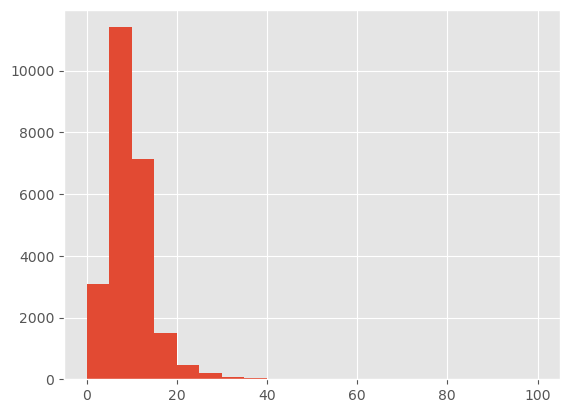

In [262]:
hist1 = df_restaurants[df_restaurants['price_range']=='$']
x1 = hist1['mean_price']
plt.style.use('ggplot')
plt.hist(x1, bins=[0,5,10,15, 20,25, 30,35, 40,45, 50,55,60,65,70,75,80,85,90,95,100])
plt.show()

In [281]:
df_restaurants[df_restaurants['price_range']=='$$'].describe()

,id,position,score,ratings,lat,lng,mean_price
count,8979.00,8979.00,4442.00,4442.00,8979.00,8979.00,8979.00
mean,18304.91,71.62,4.53,82.34,40.07,-95.02,11.76
std,12590.15,74.12,0.31,76.10,5.42,16.39,8.78
min,6.00,1.00,2.10,10.00,18.36,-123.42,0.31
25%,6212.00,13.00,4.40,29.00,37.22,-111.66,7.72
50%,17063.00,42.00,4.60,57.50,39.63,-89.61,10.29
75%,29585.50,112.00,4.70,110.75,44.35,-79.89,13.18
max,40226.00,300.00,5.00,500.00,48.94,-65.99,135.85


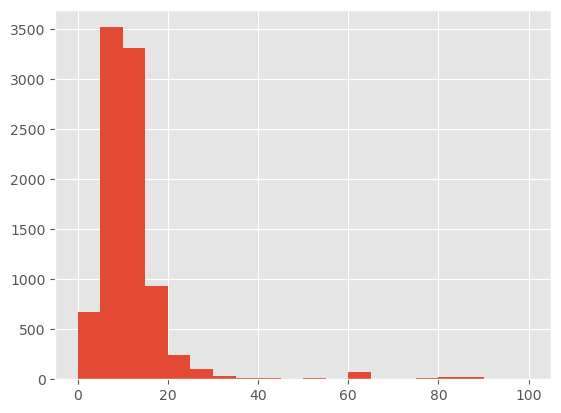

In [263]:
hist2 = df_restaurants[df_restaurants['price_range']=='$$']
x2 = hist2['mean_price']
plt.style.use('ggplot')
plt.hist(x2, bins=[0,5,10,15, 20,25, 30,35, 40,45, 50,55,60,65,70,75,80,85,90,95,100])
plt.show()

In [264]:
df_restaurants[df_restaurants['price_range']=='$$$'].describe()

,id,position,score,ratings,lat,lng,mean_price
count,149.00,149.00,103.00,103.00,149.00,149.00,149.00
mean,18997.04,119.19,4.64,73.11,40.48,-94.29,17.24
std,9760.62,83.57,0.24,76.57,5.32,19.52,7.77
min,16.00,1.00,3.40,10.00,29.46,-122.69,3.25
25%,12471.00,49.00,4.50,24.00,38.77,-122.11,12.05
50%,19222.00,105.00,4.70,42.00,38.92,-86.77,14.98
75%,23821.00,176.00,4.80,91.00,47.10,-77.15,22.75
max,40140.00,300.00,5.00,500.00,48.77,-76.99,46.33


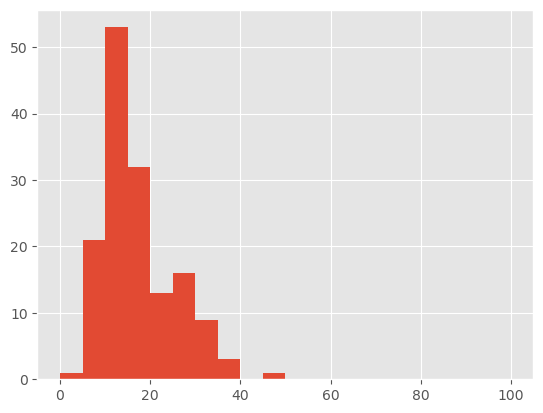

In [279]:
hist3 = df_restaurants[df_restaurants['price_range']=='$$$']
x3 = hist3['mean_price']
plt.style.use('ggplot')
plt.hist(x3, bins=[0,5,10,15, 20,25, 30,35, 40,45, 50,55,60,65,70,75,80,85,90,95,100])
plt.show()

In [266]:
df_restaurants[df_restaurants['price_range']=='$$$$'].describe()

,id,position,score,ratings,lat,lng,mean_price
count,18.00,18.00,9.00,9.00,18.00,18.00,18.00
mean,18302.56,100.78,4.56,59.22,40.84,-99.58,26.44
std,9187.06,80.70,0.22,30.87,6.13,21.14,12.82
min,1735.00,2.00,4.20,23.00,29.43,-122.65,12.38
25%,11554.25,26.75,4.40,32.00,37.12,-122.27,16.03
50%,17548.00,96.00,4.60,59.00,38.92,-98.49,21.26
75%,21095.00,148.25,4.70,79.00,47.35,-77.09,36.33
max,35572.00,263.00,4.80,109.00,47.86,-76.05,53.57


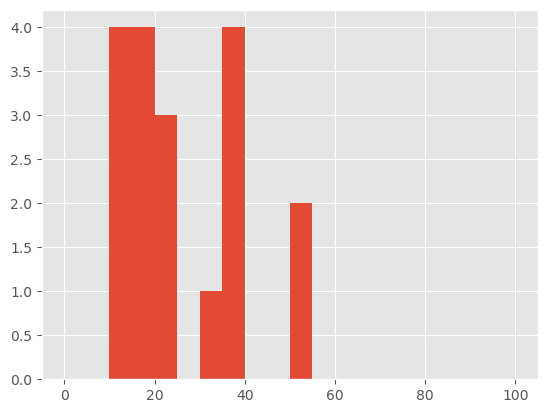

In [268]:
hist4 = df_restaurants[df_restaurants['price_range']=='$$$$']
x4 = hist4['mean_price']
plt.style.use('ggplot')
plt.hist(x4, bins=[0,5,10,15, 20,25, 30,35, 40,45, 50,55,60,65,70,75,80,85,90,95,100])
plt.show()

In [285]:
df_restaurants[df_restaurants['price_range'].isnull()].describe()

,id,position,score,ratings,lat,lng,mean_price
count,6636.00,6636.00,3067.00,3067.00,6636.00,6636.00,6636.00
mean,21280.69,110.47,4.58,56.96,39.76,-98.80,10.68
std,11327.00,81.24,0.31,58.50,6.15,18.27,5.37
min,2.00,1.00,1.90,10.00,18.35,-122.97,0.72
25%,11535.25,38.00,4.50,20.00,34.34,-122.14,7.50
50%,21081.00,96.00,4.60,37.00,38.95,-97.23,10.05
75%,31405.00,173.00,4.80,73.00,45.59,-77.51,12.66
max,40217.00,300.00,5.00,500.00,48.94,-65.99,96.71


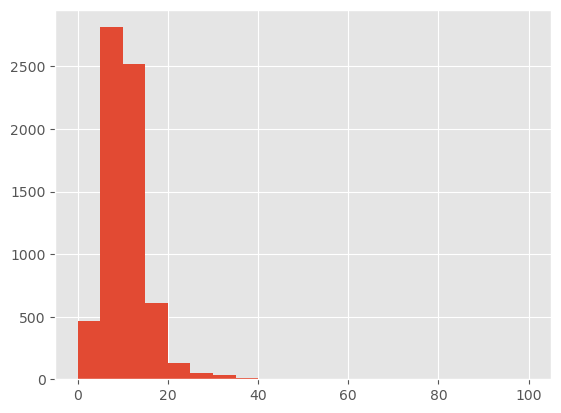

In [286]:
hist5 = df_restaurants[df_restaurants['price_range'].isnull()]
x5 = hist5['mean_price']
plt.style.use('ggplot')
plt.hist(x5, bins=[0,5,10,15, 20,25, 30,35, 40,45, 50,55,60,65,70,75,80,85,90,95,100])
plt.show()

In [287]:
# filling price range:
# 0 -11 => $
# 11-12 => $$
# 12-18 => $$$
#   >18 => $$$$

df_restaurants.loc[(df_restaurants['price_range'].isnull())&(df_restaurants['mean_price']<10),['price_range']] = '$'
df_restaurants.loc[(df_restaurants['price_range'].isnull())&(df_restaurants['mean_price']>=10)&(df_restaurants['mean_price']<12),['price_range']] = '$$'
df_restaurants.loc[(df_restaurants['price_range'].isnull())&(df_restaurants['mean_price']>=12)&(df_restaurants['mean_price']<18),['price_range']] = '$$$'
df_restaurants.loc[(df_restaurants['price_range'].isnull())&(df_restaurants['mean_price']>=18),['price_range']] = '$$$$'
df_restaurants


,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,mean_price
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.56,-86.83,5.66
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",$,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.58,-86.77,5.51
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.51,-86.85,10.76
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.40,-86.81,10.53
4,5,162,Nelson Brothers Cafe (17th St N),4.70,22.00,"Breakfast and Brunch, Burgers, Sandwiches",$,"314 17th St N, Birmingham, AL, 35203",35203,33.51,-86.81,4.53
...,...,...,...,...,...,...,...,...,...,...,...,...
39746,40223,54,Mangia la pasta! (5610 N Interstate Hwy 35),4.80,500.00,"Pasta, Comfort Food, Italian, Group Friendly",$,"5610 N I35, Austin, TX, 78751",78751,30.32,-97.71,9.79
39747,40224,53,Wholly Cow Burgers (S Lamar),4.60,245.00,"American, Burgers, Breakfast and Brunch, Aller...",$,"3010 S Lamar Blvd, Austin, TX, 78704",78704,30.24,-97.78,5.23
39748,40225,52,EurAsia Ramen 3,4.70,293.00,"Sushi, Asian, Japanese, Exclusive to Eats, Gro...",$,"5222 Burnet Road, Austin, TX, 78756",78756,30.32,-97.74,8.19
39749,40226,51,Austin's Habibi (5th St),4.70,208.00,"Mediterranean, Gluten Free Friendly, Allergy F...",$$,"817 W 5th St, Austin, TX, 78703",78703,30.27,-97.75,9.58


In [288]:
#statistics after changing values in 'price_range' column
print("Unique values: ",test_fill['price_range'].unique())
print("Number of restaurant $: ",test_fill[test_fill['price_range']=='$'].shape[0])
print("Number of restaurant $$: ",test_fill[test_fill['price_range']=='$$'].shape[0])
print("Number of restaurant $$$: ",test_fill[test_fill['price_range']=='$$$'].shape[0])
print("Number of restaurant $$$$: ",test_fill[test_fill['price_range']=='$$$$'].shape[0])

Unique values:  ['$' '$$' '$$$' '$$$$']
Number of restaurant $:  27244
Number of restaurant $$:  10311
Number of restaurant $$$:  1814
Number of restaurant $$$$:  382


## Menu file

In [30]:
df_restaurant_menus.head()

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


In [31]:
df_restaurant_menus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375211 entries, 0 to 3375210
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   restaurant_id  int64 
 1   category       object
 2   name           object
 3   description    object
 4   price          object
dtypes: int64(1), object(4)
memory usage: 128.8+ MB


#### restaurant-menus.restaurant_id

In [289]:
print("Number of unique values: ",df_restaurant_menus['restaurant_id'].nunique())
print("Unique values: ",df_restaurant_menus['restaurant_id'].unique())
print("Cells without value: ",df_restaurant_menus['restaurant_id'].isna().sum())
print("Lowest value: ",df_restaurant_menus['restaurant_id'].min())
print("Highest value: ",df_restaurant_menus['restaurant_id'].max())
print("Rows: ",df_restaurant_menus['restaurant_id'].shape[0])

Number of unique values:  40141
Unique values:  [    1     2     3 ... 40225 40226 40227]
Cells without value:  0
Lowest value:  1
Highest value:  40227
Rows:  3375211


#### restaurant-menus.category

In [63]:
print("Values numbers: ")
print(df_restaurant_menus['food_category'].value_counts())

print("Number of unique values: ",df_restaurant_menus['food_category'].nunique())
print("Unique values: ",df_restaurant_menus['food_category'].unique())
#print(sorted(list(df_restaurant_menus['food_category'].unique())))
print("Cells without value: ",df_restaurant_menus['food_category'].isna().sum())
print("Lowest value: ",df_restaurant_menus['food_category'].min())
print("Highest value: ",df_restaurant_menus['food_category'].max())
print("Rows: ",df_restaurant_menus['food_category'].shape[0])

Values numbers: 
Picked for you        145398
Sandwiches            102631
Beverages             102318
Sides                  89946
Drinks                 84604
                       ...  
Redbull Slushies           1
Gourmet Ice creams         1
Gyro Greek Burger          1
Bubble Teas                1
Almuerzo - Lunch           1
Name: food_category, Length: 51298, dtype: int64
Number of unique values:  51298
Unique values:  ['Extra Large Pizza' 'Jumbo Wings' 'Spicy Jumbo Wings' ... 'Gluten FREE'
 'Fries on Meat' 'Rice, Noodles, and Noodle Soups']
Cells without value:  0
Lowest value:      APPETIZER 
Highest value:  🧉Soft Drinks🍹
Rows:  3244661


#### restaurant-menus.name

In [34]:
print("Values numbers: ")
print(df_restaurant_menus['name'].value_counts())
print(' ')
print("Number of unique values: ",df_restaurant_menus['name'].nunique())
print("Unique values: ",df_restaurant_menus['name'].unique())

print("Cells without value: ",df_restaurant_menus['name'].isna().sum())
print("Lowest value: ",df_restaurant_menus['name'].min())
print("Highest value: ",df_restaurant_menus['name'].max())
print("Rows: ",df_restaurant_menus['name'].shape[0])

Values numbers: 
Bottled Water                       5406
French Fries                        5114
Onion Rings                         3385
Iced Tea                            3276
Caesar Salad                        3108
                                    ... 
K2. Black Ice Tea 冰红茶                  1
K1. House Special Plum Juice 酸梅汤       1
J4. Shrimp Fried Rice 虾仁炒饭             1
J3. Chicken Fried Rice 鸡肉炒饭            1
Fried Biscuits (4 pcs)                 1
Name: name, Length: 669060, dtype: int64
 
Number of unique values:  669060
Unique values:  ['Extra Large Meat Lovers' 'Extra Large Supreme' 'Extra Large Pepperoni'
 ... 'Lion Plate' 'Sesame Balls (4 pcs)' 'Fried Biscuits (4 pcs)']
Cells without value:  0
Lowest value:  

Cocoa Lover
Highest value:  🧀 *New*  Torta di formaggio grande
Rows:  3375211


#### restaurant-menus.description

In [35]:
print("Values numbers: ")
print(df_restaurant_menus['description'].value_counts())
print(' ')
print("Number of unique values: ",df_restaurant_menus['description'].nunique())
print("Unique values: ",df_restaurant_menus['description'].unique())
print(' ')
print("Cells without value: ",df_restaurant_menus['description'].isna().sum())
print("Rows: ",df_restaurant_menus['description'].shape[0])

Values numbers: 
Limit of 2                                                                                                                                                                                                                     11374
Served with white rice.                                                                                                                                                                                                         7768
Limit of 3                                                                                                                                                                                                                      4477
If a classic is what you crave, our thin-sliced Oven Roasted Turkey is the sandwich for you. It’s full of flavor and made to order with your choice of crisp veggies, served on our freshly baked, Hearty Multigrain bread.     3009
Our Steak &amp; Cheese sandwich is where warm, delicious steak gets

#### restaurant-menus.price

In [36]:
print("Values numbers: ")
print(df_restaurant_menus['price'].value_counts())
print(' ')
print("Number of unique values: ",df_restaurant_menus['price'].nunique())
print("Unique values: ",df_restaurant_menus['price'].unique())
print(' ')
print("Cells without value: ",df_restaurant_menus['price'].isna().sum())
print("Rows: ",df_restaurant_menus['price'].shape[0])


Values numbers: 
0.0 USD      112944
9.99 USD      38926
8.99 USD      35798
7.99 USD      34423
12.99 USD     33078
              ...  
29.02 USD         1
44.14 USD         1
55.9 USD          1
75.4 USD          1
55.75 USD         1
Name: price, Length: 5954, dtype: int64
 
Number of unique values:  5954
Unique values:  ['15.99 USD' '14.99 USD' '3.99 USD' ... '73.8 USD' '45.19 USD' '80.19 USD']
 
Cells without value:  0
Rows:  3375211


In [291]:
# extract price to separate column
df_restaurant_menus['price_int'] = df_restaurant_menus['price'].str.split(" ").str[-2]

# extract currency to separate column
df_restaurant_menus['currency'] = df_restaurant_menus['price'].str.split(" ").str[-1]

#change price_int to numeric type
df_restaurant_menus.price_int = pd.to_numeric(df_restaurant_menus.price_int)


In [298]:
display(df_restaurant_menus.head())
df_restaurant_menus.info()

,restaurant_id,category,name,description,price,price_int,currency
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD,15.99,USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD,15.99,USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD,14.99,USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD,15.99,USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD,14.99,USD


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3375171 entries, 0 to 3375210
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   restaurant_id  int64  
 1   category       object 
 2   name           object 
 3   description    object 
 4   price          object 
 5   price_int      float64
 6   currency       object 
dtypes: float64(1), int64(1), object(5)
memory usage: 206.0+ MB


In [293]:
df_restaurant_menus['price_int'].describe()

count   3375211.00
mean         10.25
std          13.29
min          -7.05
25%           3.95
50%           7.99
75%          13.07
max        1099.99
Name: price_int, dtype: float64

In [294]:
print('Values 0 or below:', df_restaurant_menus[df_restaurant_menus['price_int']<=0].shape[0])
df_restaurant_menus[df_restaurant_menus['price_int']<=0].head()

Values 0 or below: 112946


,restaurant_id,category,name,description,price,price_int,currency
474,11,Bundles,Build Your Own Bundle,Select your favorite flavors!,0.0 USD,0.00,USD
503,12,Bundles,Build Your Own Bundle,Select your favorite flavors!,0.0 USD,0.00,USD
574,14,You Pick Two,Sandwich and Soup/Mac,Selection of a half soup and a half sandwich,0.0 USD,0.00,USD
575,14,You Pick Two,Soup/Mac and Salad,Selection of a half soup and a half salad,0.0 USD,0.00,USD
576,14,You Pick Two,Soup/Mac and Soup/Mac,Selection of any two Soup/Mac.,0.0 USD,0.00,USD


In [60]:
#was trying to figere how many big values are in the data
sorted(dict(df_restaurant_menus['price_int'].value_counts()).items(), reverse=True)

[(925.0, 1),
 (599.0, 1),
 (450.0, 1),
 (425.0, 1),
 (390.0, 3),
 (389.95, 1),
 (375.0, 6),
 (374.99, 2),
 (374.98, 1),
 (371.0, 6),
 (370.0, 2),
 (369.99, 3),
 (369.0, 1),
 (368.0, 6),
 (363.0, 2),
 (360.99, 1),
 (360.0, 1),
 (359.99, 1),
 (356.5, 10),
 (354.0, 1),
 (352.74, 4),
 (349.99, 2),
 (339.99, 3),
 (333.5, 6),
 (330.0, 2),
 (329.99, 5),
 (329.0, 1),
 (328.79, 1),
 (327.0, 1),
 (325.0, 3),
 (322.0, 8),
 (321.99, 1),
 (320.99, 2),
 (319.99, 2),
 (318.99, 2),
 (317.99, 6),
 (315.0, 2),
 (311.99, 1),
 (311.96, 1),
 (310.5, 6),
 (310.0, 2),
 (309.99, 1),
 (305.07, 1),
 (303.59, 1),
 (300.0, 2),
 (299.99, 17),
 (299.4, 1),
 (299.0, 5),
 (298.99, 5),
 (297.0, 2),
 (296.99, 6),
 (295.79, 1),
 (295.0, 1),
 (294.99, 1),
 (293.95, 1),
 (292.99, 1),
 (292.59, 1),
 (289.99, 7),
 (289.98, 1),
 (289.0, 57),
 (288.99, 1),
 (288.0, 1),
 (287.5, 2),
 (286.5, 2),
 (286.0, 3),
 (285.99, 2),
 (284.99, 1),
 (283.73, 2),
 (281.75, 2),
 (279.99, 6),
 (279.5, 1),
 (276.09, 16),
 (275.4, 2),
 (275.0, 

In [56]:
max_price = df_restaurant_menus['price_int'].max()
df_restaurant_menus[df_restaurant_menus['price_int'] == max_price]

,id,food_category,food_name,description,price,price_int,currency
34637,485,Strollers,UPPAbaby® VISTA V2 Stroller in Declan,The UPPAbaby VISTA V2 Stroller is uniquely des...,1099.99 USD,1099.99,USD
34642,485,Strollers,UPPAbaby® VISTA V2 Stroller in Greyson,The UPPAbaby VISTA V2 Stroller is uniquely des...,1099.99 USD,1099.99,USD
34647,485,Strollers,UPPAbaby® VISTA V2 Stroller in Gregory Blue Me...,The UPPAbaby VISTA V2 Stroller is uniquely des...,1099.99 USD,1099.99,USD
194678,2633,Strollers,UPPAbaby® VISTA V2 Stroller in Greyson,The UPPAbaby VISTA V2 Stroller is uniquely des...,1099.99 USD,1099.99,USD
194693,2633,Strollers,UPPAbaby® VISTA V2 Stroller in Jake,The UPPAbaby VISTA V2 Stroller is uniquely des...,1099.99 USD,1099.99,USD
1059109,13314,Strollers,UPPAbaby® VISTA V2 Stroller in Bryce,The UPPAbaby VISTA V2 Stroller is uniquely des...,1099.99 USD,1099.99,USD
1059113,13314,Strollers,UPPAbaby® VISTA V2 Stroller in Gregory Blue Me...,The UPPAbaby VISTA V2 Stroller is uniquely des...,1099.99 USD,1099.99,USD
1561979,18263,Strollers,UPPAbaby® VISTA V2 Stroller in Emmett,The UPPAbaby VISTA V2 Stroller is uniquely des...,1099.99 USD,1099.99,USD
1571625,18360,Strollers,UPPAbaby® VISTA V2 Stroller in Stella,The UPPAbaby VISTA V2 Stroller is uniquely des...,1099.99 USD,1099.99,USD
1571631,18360,Strollers,UPPAbaby® VISTA V2 Stroller in Alice,The UPPAbaby VISTA V2 Stroller is uniquely des...,1099.99 USD,1099.99,USD


In [302]:
#deleting max price
df_restaurant_menus = df_restaurant_menus.loc[df_restaurant_menus['price_int']!=max_price]

#checking different food categories according their price (sort of manual check)
display(df_restaurant_menus.shape)
display(df_restaurant_menus[(df_restaurant_menus['price_int'] <0.02) & (df_restaurant_menus['price_int'] >0)])

#deleting category 'Strollers'
df_restaurant_menus = df_restaurant_menus.loc[df_restaurant_menus['food_category'] != 'Strollers']

#deleting category 'Furniture'
df_restaurant_menus = df_restaurant_menus.loc[df_restaurant_menus['food_category'] != 'Furniture']

#deleting category 'Kitchen'
df_restaurant_menus = df_restaurant_menus.loc[df_restaurant_menus['food_category'] != 'Kitchen']

#deleting category 'Storage & Cleaning'
df_restaurant_menus = df_restaurant_menus.loc[df_restaurant_menus['food_category'] != 'Storage & Cleaning']

#deleting category 'Car Seats'
df_restaurant_menus = df_restaurant_menus.loc[df_restaurant_menus['food_category'] != 'Car Seats']

#deleting category 'Bedding'
df_restaurant_menus = df_restaurant_menus.loc[df_restaurant_menus['food_category'] != 'Bedding']

#deleting category 'Health & Safety'
df_restaurant_menus = df_restaurant_menus.loc[df_restaurant_menus['food_category'] != 'Health & Safety']

#deleting category 'Ruby Tuesday Pantry'
df_restaurant_menus = df_restaurant_menus.loc[df_restaurant_menus['food_category'] != 'Ruby Tuesday Pantry']

#deleting category 'Nursing & Feeding'
df_restaurant_menus = df_restaurant_menus.loc[df_restaurant_menus['food_category'] != 'Nursing & Feeding']

#deleting category 'Smart Home & Home Improvement'
df_restaurant_menus = df_restaurant_menus.loc[df_restaurant_menus['food_category'] != 'Smart Home & Home Improvement']

#deleting category 'Toys & Learning'
df_restaurant_menus = df_restaurant_menus.loc[df_restaurant_menus['food_category'] != 'Toys & Learning']

#deleting category 'Gear & Travel'
df_restaurant_menus = df_restaurant_menus.loc[df_restaurant_menus['food_category'] != 'Gear & Travel']

#deleting category 'Home Decor'
df_restaurant_menus = df_restaurant_menus.loc[df_restaurant_menus['food_category'] != 'Home Decor']

#deleting category 'Tender Bender'
df_restaurant_menus = df_restaurant_menus.loc[df_restaurant_menus['food_category'] != 'Tender Bender']

#deleting category 'Dining'
df_restaurant_menus = df_restaurant_menus.loc[df_restaurant_menus['food_category'] != 'Dining']

#deleting category 'Home Health Care'
df_restaurant_menus = df_restaurant_menus.loc[df_restaurant_menus['food_category'] != 'Home Health Care']

#deleting category 'Supplies'
df_restaurant_menus = df_restaurant_menus.loc[df_restaurant_menus['food_category'] != 'Supplies']


#deleting price_int = 0 
df_restaurant_menus = df_restaurant_menus.loc[df_restaurant_menus['price_int'] != 0]



(3244651, 7)

,id,food_category,food_name,description,price,price_int,currency
674600,7899,Appertizers,Order Test 2012,NaN,0.01 USD,0.01,USD
709950,8385,Bread and olive oil / Utensils,Utensils,Enough utensils to accompany your order.,0.01 USD,0.01,USD
714432,8433,Fortune cookies &amp; Utensils,Soy Sauce packets (Allergy notes: contains whe...,How many?,0.01 USD,0.01,USD
817657,9856,Picked for you,"Plates, Napkins, Forks",only a penny but by request only,0.01 USD,0.01,USD
880785,10681,NEED UTENSiLS?,Utensils,"If you need utensils, please select below!",0.01 USD,0.01,USD
951545,11725,Utensils,Utensils 餐具,Forks and napkins. Need chopsticks? Pls send u...,0.01 USD,0.01,USD
1102864,13830,Sides,Side Item,NaN,0.01 USD,0.01,USD
1112148,13914,Sides,Side Item,NaN,0.01 USD,0.01,USD
1190991,14784,Most Popular,Chicken 65 Biryani,Chicken sixty five and basmati rice cooked in ...,0.01 USD,0.01,USD
1504858,17565,Grilled Shrimp,Grilled Shrimp Only,Served with rice.,0.01 USD,0.01,USD


In [86]:
df_highest_priced = df_restaurants[df_restaurants['price_range']=='$$$$']
print("Number of restaurant $$$$: ",df_restaurants[df_restaurants['price_range']=='$$$$'].shape[0])
highest_priced_list = list(df_highest_priced['id'].unique())
print(highest_priced_list)

Number of restaurant $$$$:  18
[1735, 7893, 10270, 10362, 11023, 13148, 14983, 15629, 17506, 17590, 19899, 20228, 20594, 21262, 25069, 31229, 35454, 35572]


In [153]:
df_highest_priced_menu = df_restaurant_menus[df_restaurant_menus['id'].isin(highest_priced_list)]
display(df_highest_priced_menu.describe())
display(df_highest_priced_menu)


,id,price_int
count,923.00,923.00
mean,18248.36,24.50
std,8110.23,25.09
min,1735.00,0.40
25%,13148.00,12.00
50%,17590.00,17.00
75%,20594.00,26.00
max,35572.00,275.00


,id,food_category,food_name,description,price,price_int,currency
129686,1735,Picked for you,Mix Grill,"With beef kofta, kabob, shish, tawook, rice, h...",19.99 USD,19.99,USD
129687,1735,Picked for you,Arabic Chicken Shawarma,Chicken shawarma in shrak bread toasted and cu...,17.99 USD,17.99,USD
129688,1735,Picked for you,Hummus,NaN,8.99 USD,8.99,USD
129689,1735,Picked for you,Chicken Shawarma Sandwich,"Garlic, sauce,tomato, and pickles.",9.99 USD,9.99,USD
129690,1735,Picked for you,Chicken Kofta Plate,"Three skewers with rice, hummus, and salad.",17.99 USD,17.99,USD
...,...,...,...,...,...,...,...
3044087,35572,Desserts,Carrot Cake,NaN,18.7 USD,18.70,USD
3044088,35572,Kids Meals,Buttery Noodles,Choice of penne or linguine.,12.1 USD,12.10,USD
3044089,35572,Kids Meals,Kid Steak,6 oz filet served with french fries.,33.0 USD,33.00,USD
3044090,35572,Kids Meals,Linguine with Marinara,NaN,12.1 USD,12.10,USD


In [87]:
df_high_priced = df_restaurants[df_restaurants['price_range']=='$$$']
print("Number of restaurant $$$: ",df_restaurants[df_restaurants['price_range']=='$$$'].shape[0])
high_priced_list = list(df_high_priced['id'].unique())
print(high_priced_list)

Number of restaurant $$$:  147
[16, 33, 94, 192, 453, 738, 1782, 2031, 2233, 2500, 3112, 4624, 6117, 7047, 7822, 7906, 8216, 8336, 8347, 8740, 9017, 9121, 9172, 9235, 9289, 9303, 9500, 9718, 9822, 10039, 10324, 10458, 10608, 11320, 11381, 12164, 12471, 12921, 12955, 13094, 13145, 13594, 13708, 13781, 13955, 14238, 14246, 14723, 14989, 15283, 15306, 15359, 15413, 15426, 15529, 15809, 15891, 16205, 17706, 17856, 17979, 18062, 18194, 18206, 18298, 18851, 18853, 18900, 18925, 18948, 18963, 18973, 18979, 19224, 19256, 19322, 19393, 19424, 19661, 19702, 19724, 19883, 19926, 20018, 20038, 20209, 20251, 20374, 20411, 20528, 20550, 20620, 20921, 20994, 21523, 21615, 21692, 21926, 21973, 22134, 22179, 22331, 22345, 22376, 22518, 22983, 22999, 23168, 23740, 23821, 24089, 24258, 24583, 24698, 25054, 26445, 26596, 26700, 26864, 27395, 27396, 27861, 28647, 28767, 28881, 28977, 29017, 29075, 29872, 33102, 33120, 33459, 35283, 35517, 35802, 36385, 36700, 37118, 37729, 38001, 38639, 38719, 39479, 39506

In [154]:
df_high_priced_menu = df_restaurant_menus[df_restaurant_menus['id'].isin(high_priced_list)]
display(df_high_priced_menu.describe())
display(df_high_priced_menu)

,id,price_int
count,8782.00,8782.00
mean,18821.90,16.96
std,9371.51,16.55
min,16.00,0.50
25%,12921.00,7.72
50%,18973.00,13.99
75%,22983.00,19.95
max,40140.00,220.00


,id,food_category,food_name,description,price,price_int,currency
791,16,Picked for you,Gooey Butter Cake Pint,Cream cheese ice cream layered with crumbles o...,14.0 USD,14.00,USD
792,16,Picked for you,Brambleberry Crisp Pint,Oven-toasted oat streusel and a sweet-tart “br...,14.0 USD,14.00,USD
793,16,Picked for you,Brown Butter Almond Brittle Pint,Brown-butter-almond candy crushed into butterc...,14.0 USD,14.00,USD
794,16,Picked for you,Milkiest Chocolate Pint,"An ultra-lush milky chocolate, like a fine Swi...",14.0 USD,14.00,USD
795,16,Picked for you,Salted Peanut Butter with Chocolate Flecks Pint,Salted and roasted ground peanuts with grass-g...,14.0 USD,14.00,USD
...,...,...,...,...,...,...,...
3368497,40140,Appetizers,Homemade Bread - Half Loaf White,NaN,4.49 USD,4.49,USD
3368498,40140,Appetizers,Homemade Bread - Whole Loaf White,NaN,7.49 USD,7.49,USD
3368499,40140,Meals,BBQ Emergency Kit,"1 Person Per Kit. Brisket, Sausage, Chicken, ...",15.99 USD,15.99,USD
3368507,40140,Ala Meats,BBQ Chicken - Half,Served with a side of BBQ Sauce,8.99 USD,8.99,USD


In [89]:
df_avrg_priced = df_restaurants[df_restaurants['price_range']=='$$']
print("Number of restaurant $$: ",df_restaurants[df_restaurants['price_range']=='$$'].shape[0])
avrg_priced_list = list(df_avrg_priced['id'].unique())
print(avrg_priced_list)

Number of restaurant $$:  8930
[6, 20, 29, 30, 31, 34, 37, 44, 50, 55, 62, 88, 95, 99, 101, 104, 109, 128, 133, 135, 141, 151, 156, 160, 162, 169, 171, 172, 174, 178, 186, 193, 197, 200, 201, 216, 239, 240, 244, 249, 260, 267, 274, 276, 278, 280, 283, 287, 293, 300, 301, 304, 306, 320, 326, 333, 344, 350, 352, 353, 357, 360, 364, 371, 373, 385, 386, 388, 389, 393, 394, 395, 396, 397, 399, 400, 402, 405, 408, 409, 412, 415, 417, 421, 422, 426, 427, 431, 437, 441, 444, 450, 457, 459, 462, 463, 465, 467, 470, 474, 477, 483, 484, 490, 491, 493, 496, 506, 508, 516, 520, 521, 530, 536, 542, 544, 552, 560, 561, 569, 570, 571, 572, 575, 579, 581, 582, 587, 599, 600, 603, 604, 606, 607, 612, 615, 621, 624, 625, 626, 628, 634, 637, 640, 646, 647, 649, 651, 653, 655, 656, 658, 659, 660, 661, 662, 663, 664, 665, 667, 668, 671, 673, 679, 681, 683, 702, 703, 704, 713, 715, 716, 722, 723, 724, 725, 732, 733, 734, 744, 745, 748, 750, 752, 753, 756, 761, 766, 768, 773, 774, 781, 782, 784, 787, 799, 809

In [155]:
df_avrg_priced_menu = df_restaurant_menus[df_restaurant_menus['id'].isin(avrg_priced_list)]
display(df_avrg_priced_menu.describe())
display(df_avrg_priced_menu)

,id,price_int
count,582258.00,582258.00
mean,19257.33,12.36
std,12459.29,12.90
min,6.00,-7.05
25%,7143.00,5.75
50%,18953.00,10.00
75%,30571.00,15.00
max,40226.00,450.00


,id,food_category,food_name,description,price,price_int,currency
286,6,Picked for you,Hereford Filet Mignon,"Potato pave, haricot verts, caramalized onion ...",44.0 USD,44.00,USD
287,6,Picked for you,Alaskan Halibut,"lemongrass &amp; ginger tea crusted, cucumber ...",40.0 USD,40.00,USD
288,6,Picked for you,King Crab Cobb Salad,"plus king crab, avocado, quail eggs, bacon lar...",43.0 USD,43.00,USD
289,6,Picked for you,Grilled King Salmon,"artichoke barigoule, baby carrots, pearl onion...",36.0 USD,36.00,USD
290,6,Picked for you,Lobster Tortellini,"plus maine lobster, english peas, fennel shall...",18.0 USD,18.00,USD
...,...,...,...,...,...,...,...
3375047,40226,Menu,Pita Bread,NaN,2.0 USD,2.00,USD
3375048,40226,Fries on Meat,Fries on Gyro,NaN,10.0 USD,10.00,USD
3375049,40226,Fries on Meat,Fries on Beef,NaN,10.0 USD,10.00,USD
3375050,40226,Fries on Meat,Fries on Combo,NaN,10.0 USD,10.00,USD


In [91]:
df_low_priced = df_restaurants[df_restaurants['price_range']=='$']
print("Number of restaurant $: ",df_restaurants[df_restaurants['price_range']=='$'].shape[0])
low_priced_list = list(df_low_priced['id'].unique())
print(low_priced_list)

Number of restaurant $:  24124
[1, 3, 4, 7, 8, 9, 10, 11, 12, 14, 18, 19, 22, 24, 26, 27, 28, 32, 35, 36, 38, 39, 40, 41, 42, 43, 47, 49, 53, 54, 58, 59, 60, 63, 67, 68, 69, 70, 71, 73, 82, 84, 85, 89, 90, 91, 93, 96, 97, 102, 105, 110, 112, 114, 115, 116, 117, 118, 119, 120, 121, 123, 125, 127, 129, 131, 132, 137, 139, 143, 147, 148, 149, 150, 153, 155, 157, 159, 163, 164, 165, 166, 167, 168, 170, 173, 176, 177, 179, 180, 181, 183, 184, 187, 189, 190, 191, 195, 196, 198, 199, 202, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 215, 217, 218, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 237, 238, 241, 242, 243, 245, 247, 248, 250, 251, 252, 253, 254, 255, 257, 262, 263, 266, 268, 269, 272, 273, 277, 279, 284, 285, 286, 288, 289, 290, 291, 292, 294, 295, 296, 297, 298, 299, 302, 303, 305, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 318, 319, 322, 324, 325, 327, 328, 329, 330, 331, 332, 334, 335, 336, 337, 338, 339, 340, 341, 342, 345, 346, 349

In [156]:
df_low_priced_menu = df_restaurant_menus[df_restaurant_menus['id'].isin(low_priced_list)]
display(df_low_priced_menu.describe())
display(df_low_priced_menu)

,id,price_int
count,2228195.00,2228195.00
mean,19818.94,9.63
std,10843.95,10.11
min,1.00,0.01
25%,10905.00,3.87
50%,19497.00,7.50
75%,28089.00,12.39
max,40227.00,925.00


,id,food_category,food_name,description,price,price_int,currency
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD,15.99,USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD,15.99,USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD,14.99,USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD,15.99,USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD,14.99,USD
...,...,...,...,...,...,...,...
3375206,40227,Kid’s Mains,Lion Plate,BBQ skewer two pices and fantail shrimp two pi...,8.55 USD,8.55,USD
3375207,40227,Beverages,Soft Drinks,NaN,1.95 USD,1.95,USD
3375208,40227,Beverages,Iced Tea,NaN,1.95 USD,1.95,USD
3375209,40227,Desserts,Sesame Balls (4 pcs),NaN,3.95 USD,3.95,USD


In [304]:
#after filling NaN in restaurant file the number is 0
df_empty_priced = df_restaurants[df_restaurants['price_range']=='nan']
print("Number of restaurant without price_range: ",df_restaurants[df_restaurants['price_range']=='nan'].shape[0])
empty_priced_list = list(df_empty_priced['id'].unique())
print(empty_priced_list)

Number of restaurant without price_range:  0
[]


In [125]:
df_empty_priced

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,onlyname,city,state
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",nan,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330,J' ti`'z Smoothie-N-Coffee Bar,Birmingham,AL
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",nan,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,Nelson Brothers Cafe,Birmingham,AL
12,13,116,Bunrise Burgers,NaN,NaN,"Burgers, Fast Food, American, Comfort Food, Di...",nan,"1100 Forestdale Boulevard, Birmingham, AL, 35214",35214,33.557410,-86.890300,Bunrise Burgers,Birmingham,AL
14,15,139,The Imperial Indian,NaN,NaN,"Indian, Vegetarian, Pakistani, Chicken, Indian...",nan,"1024 20th Street South Unit 101, Birmingham, A...",35205,33.500900,-86.796900,The Imperial Indian,Birmingham,AL
16,17,60,Exotic Wings &amp; Things,NaN,NaN,"Halal, Chicken, Wings",nan,"208 Green Springs Avenue South, Birmingham, AL...",35205,33.484584,-86.823947,Exotic Wings &amp; Things,Birmingham,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40192,40193,92,Papi's,NaN,NaN,"Sandwiches, Salads, Vegetarian Friendly",nan,"1190 Chicon Street, Austin, TX, 78702",78702,30.272830,-97.719810,Papi's,Austin,TX
40193,40194,89,Toasty's Breakfast Burritos - 2125 W Ben White,4.1,107.0,"Breakfast and Brunch, Burritos, American, Vega...",nan,"2125 West Ben White Boulevard, Austin, TX, 78704",78704,30.230970,-97.791740,Toasty's Breakfast Burritos - 2125 W Ben White,Austin,TX
40212,40213,67,Brisk Thai,4.5,146.0,"Asian, Asian Fusion, Fast Food, Group Friendly",nan,"5610 North Interstate Highway 35, Austin, TX, ...",78751,30.316223,-97.708412,Brisk Thai,Austin,TX
40215,40216,64,East and Feast Lounge,4.3,27.0,"Mediterranean, Vegetarian, Turkish, Allergy Fr...",nan,"1311 South 1st Street, Austin, TX, 78704",78704,30.250830,-97.754250,East and Feast Lounge,Austin,TX


In [128]:
df_empty_priced_menu = df_restaurant_menus[df_restaurant_menus['id'].isin(empty_priced_list)]

In [172]:
df_empty_priced_menu.groupby(by=['id']).mean()

,price_int
id,
2,5.51
5,4.53
13,7.81
15,15.10
17,7.54
...,...
40193,9.47
40194,8.47
40213,11.12


In [173]:
#prepearing table with mean prices in restaurants to join with restaurant df
df_means = df_restaurant_menus.groupby(by=['id']).mean()
df_means

,price_int
id,
1,5.66
2,5.51
3,10.76
4,10.53
5,4.53
...,...
40223,9.79
40224,5.23
40225,8.19


In [300]:
#rename of the columns to prepeare joining tables
df_restaurant_menus = df_restaurant_menus.rename(columns={'restaurant_id':'id', 'category' : 'food_category', 'name' : 'food_name'})
df_restaurant_menus.head()

,id,food_category,food_name,description,price,price_int,currency
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD,15.99,USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD,15.99,USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD,14.99,USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD,15.99,USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD,14.99,USD
